In [1]:
import numpy as np 
import matplotlib.pyplot as plt

import glob
import os

from matplotlib import rc

rc('font',**{'family':'sans-serif','sans-serif':['Fira Sans'],'size':12,'style':'normal'})
rc('text', usetex=False)



BLUE = 'xkcd:pastel blue'
RED = 'xkcd:pastel red'
GREEN = 'xkcd:pastel green'
YELLOW ='xkcd:pastel yellow'
PURPLE = 'xkcd:pastel purple'
DBLUE = 'xkcd:light navy blue'



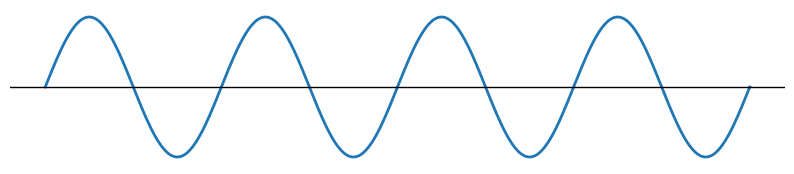

In [2]:
f = np.linspace(1,1,500)
x = np.linspace(0, 8*np.pi, 500)
y = np.sin(f*x)

# Plot
fig, ax = plt.subplots(figsize = (10,2))
ax.plot(x, y, linewidth=2)

# Remove y-axis
ax.spines['left'].set_visible(False)
ax.yaxis.set_visible(False)

# Keep only x-axis line
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.axhline(0, color='black', linewidth=1)


# Remove ticks and labels
ax.set_xticks([])
ax.set_yticks([])
plt.savefig("sine_wave.png", dpi=300, bbox_inches='tight')



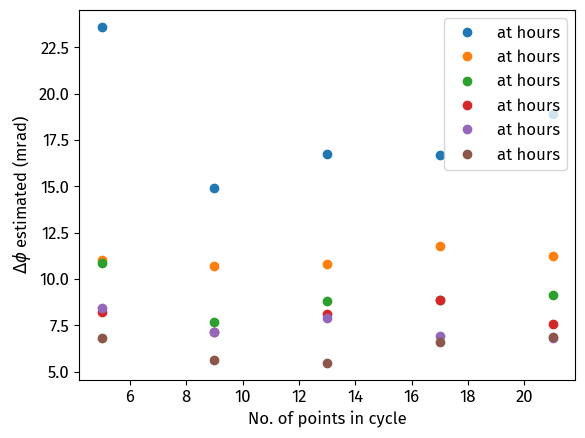

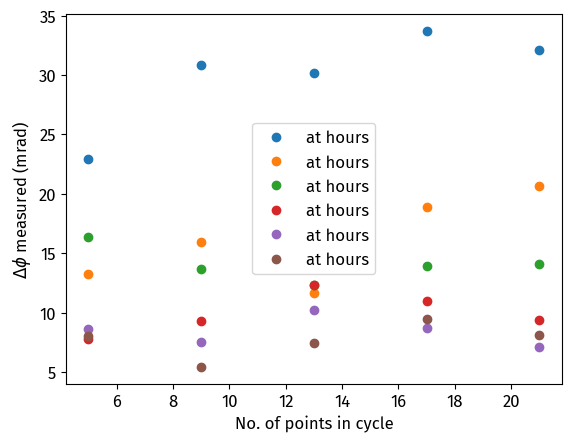

In [5]:
# Directory path
directory = "phase_estimation_runs/run_3/"

# Pattern for text files, e.g. all files starting with "data" and ending with ".txt"
uncertainty_files = os.path.join(directory, "*hours_uncertainty.txt")
error_files = os.path.join(directory, "*hours_true_error.txt")

files = sorted(glob.glob(uncertainty_files))

for f in files:
    data = np.loadtxt(f)
    plt.plot(data[0],data[1]*1e3,'o',label = f[11:13]+' hours')

plt.xlabel('No. of points in cycle')
plt.ylabel('$\Delta\phi$ estimated (mrad)')
plt.legend()

plt.savefig(directory+'uncertainties.pdf')

plt.figure()
files = sorted(glob.glob(error_files))

for f in files:
    data = np.loadtxt(f)
    plt.plot(data[0],data[1]*1e3,'o',label = f[11:13]+' hours')

plt.xlabel('No. of points in cycle')
plt.ylabel('$\Delta\phi$ measured (mrad)')
plt.legend()
plt.savefig(directory+'errors.pdf')

Text(0, 0.5, '$\\Delta\\phi$ measured (mrad)')

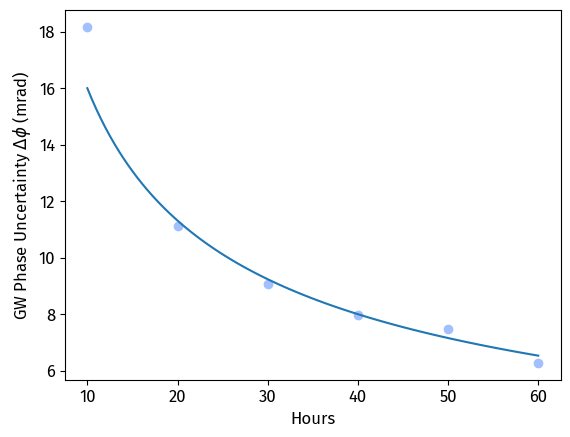

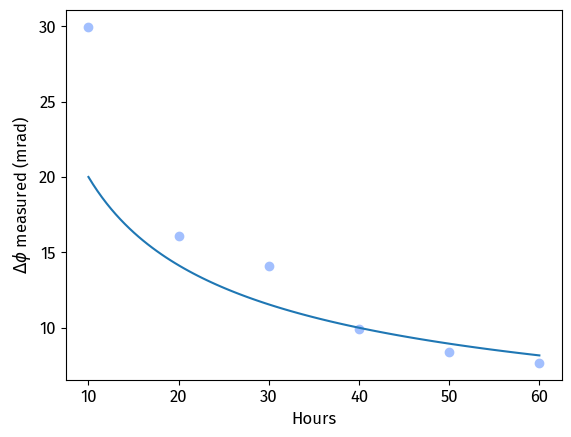

In [14]:
# Directory path
directory = "phase_estimation_runs/run_3/"


# Pattern for text files, e.g. all files starting with "data" and ending with ".txt"
uncertainty_files = os.path.join(directory, "*hours_uncertainty.txt")
error_files = os.path.join(directory, "*hours_true_error.txt")

files = sorted(glob.glob(uncertainty_files))
h = []
err = []
for f in files:
    data = np.loadtxt(f)
    hours = int(f[28:30])
    h.append(hours)
    err.append(np.mean(data[1])*1e3)
    
plt.plot(h,err, color = BLUE, marker = 'o', linestyle = 'None')
hs = np.linspace(10,60,100)
plt.plot(hs, 16/np.sqrt(hs/10))

plt.xlabel('Hours')
plt.ylabel('GW Phase Uncertainty $\Delta\phi$ (mrad)')


plt.savefig(directory+'uncertainty_hour.pdf')
files = sorted(glob.glob(error_files))

plt.figure()
h = []
err = []
for f in files:
    data = np.loadtxt(f)
    hours = int(f[28:30])
    h.append(hours)
    err.append(np.mean(data[1])*1e3)
    
plt.plot(h,err, color = BLUE, marker = 'o', linestyle = 'None')
hs = np.linspace(10,60,100)
plt.plot(hs, 20/np.sqrt(hs/10))
plt.xlabel('Hours')
plt.ylabel('$\Delta\phi$ measured (mrad)')
# plt.legend()
# plt.savefig(directory+'errors.pdf')

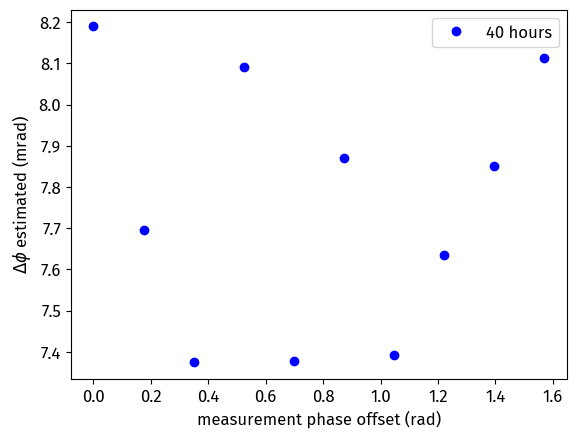

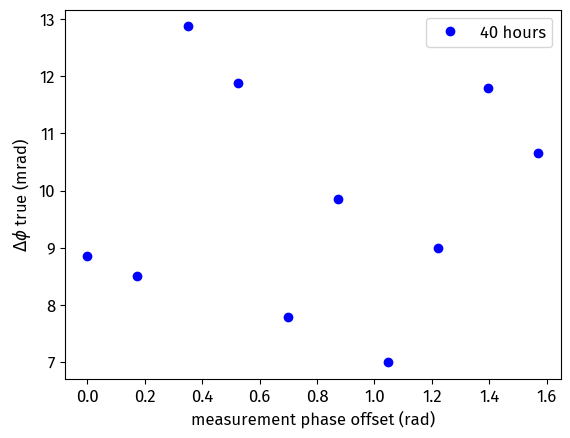

In [51]:
offset_uncertainty = np.loadtxt('offsets.txt')
plt.plot(offset_uncertainty[0],offset_uncertainty[1]*1e3,'bo', label = '40 hours')
plt.xlabel('measurement phase offset (rad)')
plt.ylabel('$\Delta\phi$ estimated (mrad)')
plt.legend()
plt.savefig('offset_uncertainties.pdf')
plt.figure()
offset_uncertainty = np.loadtxt('offsets_errors.txt')
plt.plot(offset_uncertainty[0],offset_uncertainty[1]*1e3,'bo', label = '40 hours')
plt.xlabel('measurement phase offset (rad)')
plt.ylabel('$\Delta\phi$ true (mrad)')
plt.legend()
plt.savefig('offset_error.pdf')




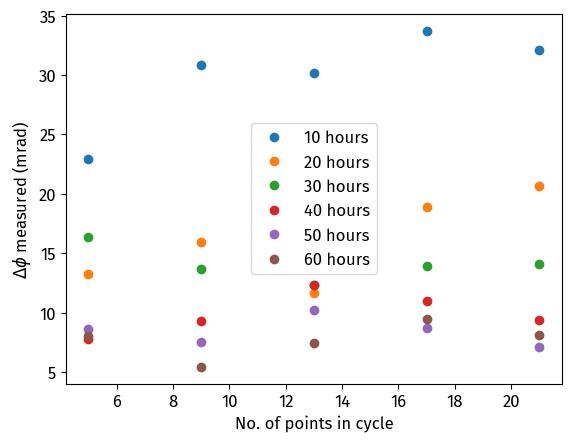

In [26]:
files

['data_run_3/40 hours_uncertainty.txt',
 'data_run_3/30 hours_uncertainty.txt',
 'data_run_3/20 hours_uncertainty.txt',
 'data_run_3/50 hours_uncertainty.txt',
 'data_run_3/60 hours_uncertainty.txt',
 'data_run_3/10 hours_uncertainty.txt']